# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #enabling to  printing multple outputs on one cell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df = df.sort_values(by = 'release_year')
df['genres'] = df['genres'].str.replace('\d+','')# removing numbers from genre columns


C:\Users\marsh\AppData\Local\Temp\ipykernel_26048\503685047.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['genres'] = df['genres'].str.replace('\d+','')# removing numbers from genre columns


In [3]:
years=df['release_year'].unique()
year_popular=[]
production_company=[]
for i in years:
    tempdf=df[df.release_year ==i]
    temp2df=tempdf[tempdf.popularity == tempdf.popularity.max()]
    max_popularity=temp2df['popularity'].max()
    

    production_company_val=temp2df['production_companies']
    year_popular.append(max_popularity)
    production_company.append(production_company_val)
    
    

Text(0, 0.5, 'Amount in USD')

Text(0.5, 0, 'Movie title')

Text(0.5, 1.0, 'Top 10 popular movies budget and revenue')

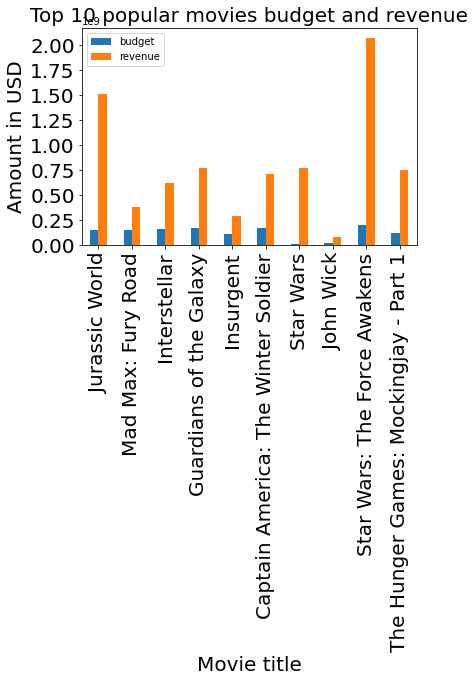

In [4]:
#budget agnaist revenue
df_budget=df.nlargest(n=10, columns='popularity')
df_budget = df_budget.sort_values(by = 'popularity',ascending=False)
#f_budget.plot
#plt.bar(df_budget['budget'],df_budget['revenue'])
#plt.show()
ax=df_budget.plot.bar(x='original_title', y=['budget','revenue'], rot=90,fontsize=20)
plt.ylabel('Amount in USD',fontsize=20)
plt.xlabel('Movie title',fontsize=20)
plt.title('Top 10 popular movies budget and revenue',fontsize=20)
plt.savefig("Budget and revenue for populr movies,jpg",bbox_inches='tight')

# function for plotting single bar graphs in python

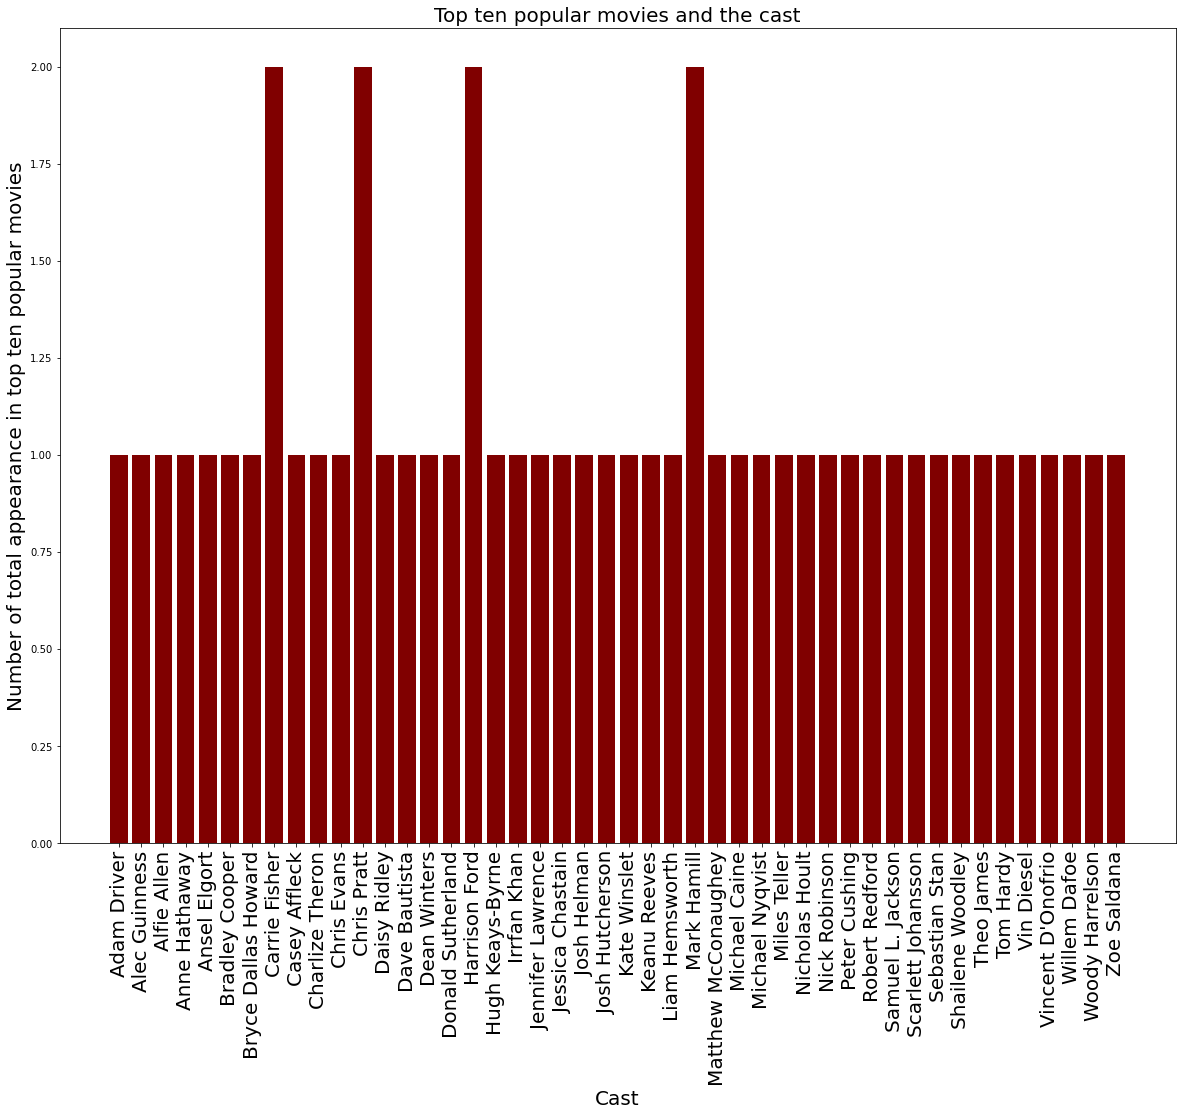

In [13]:
def bargraphplot(x,y,colorr,title,x_label,y_label):
    plt.figure(figsize=(20,15))
    plt.bar(x, y, color=colorr, width = 0.8)
    plt.xticks(rotation=90,fontsize=20)
    plt.xlabel(x_label,fontsize=20)
    plt.ylabel(y_label,fontsize=20)
    plt.title(title,fontsize=20)



# Top ten popular movies and the cast

In [6]:

df_cast=df.nlargest(n=10, columns='popularity')
df_cast = df_cast.sort_values(by = 'popularity',ascending=False)
df_popular_actors=df_cast['cast'].str.split(r"|", expand=True)

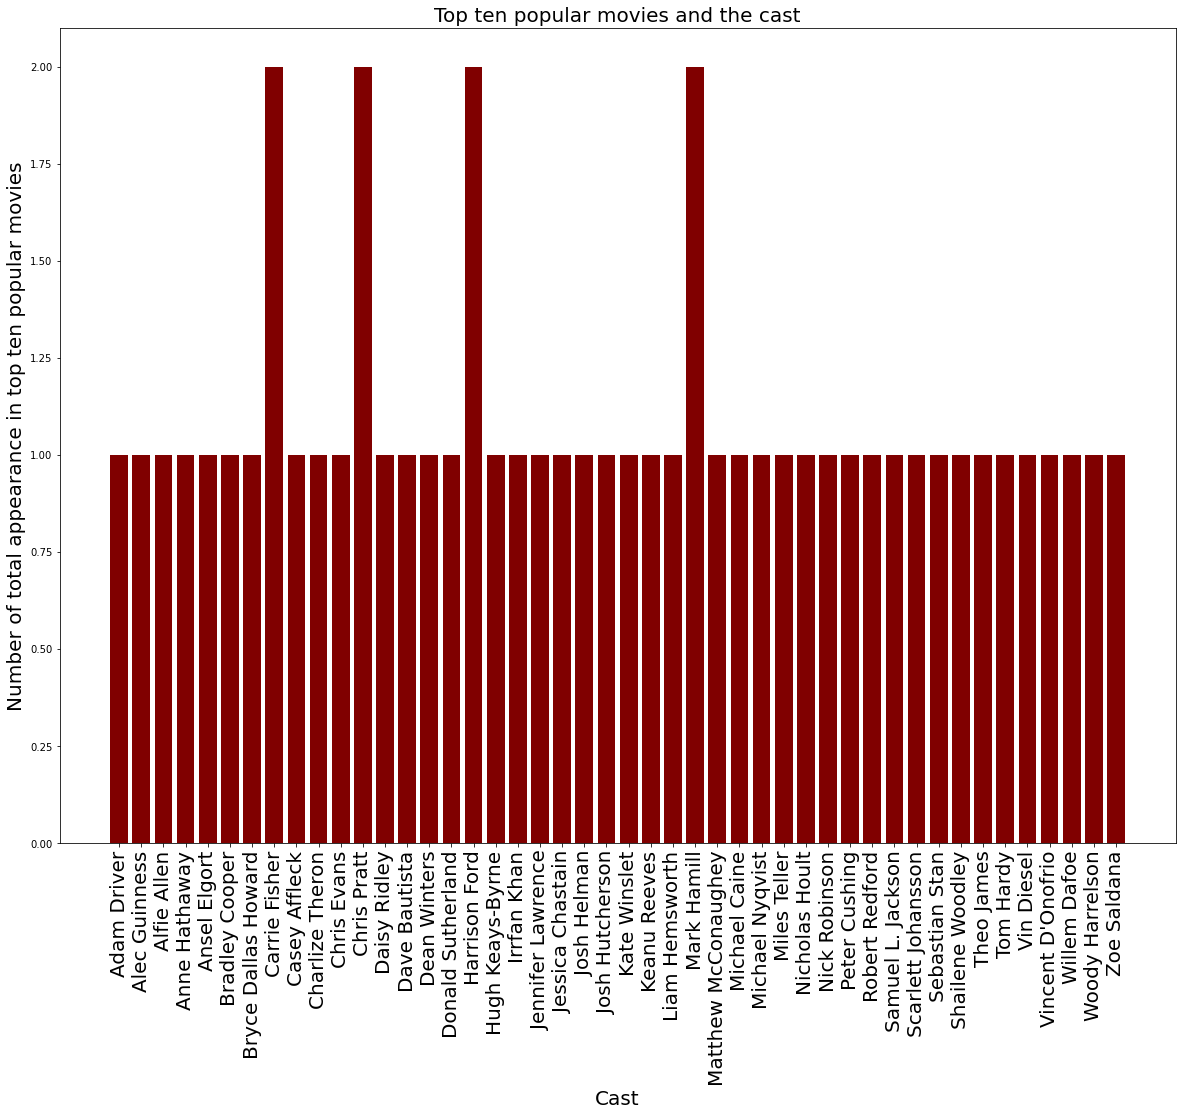

In [14]:
df22=df_popular_actors.apply(pd.value_counts) # finding the total apperances in top populairity movies
df22['total_appearances']=df22.sum(axis = 1)
bargraphplot(df22.index,
             df22.total_appearances,
             'maroon',
             'Top ten popular movies and the cast',
             "Cast",
             "Number of total appearance in top ten popular movies")
plt.savefig("Top ten popular movies and the cast.jpg",bbox_inches='tight')
#df22.plot.bar(y='total_appearances',rotation=90)

# Top ten popular movies and the production companies

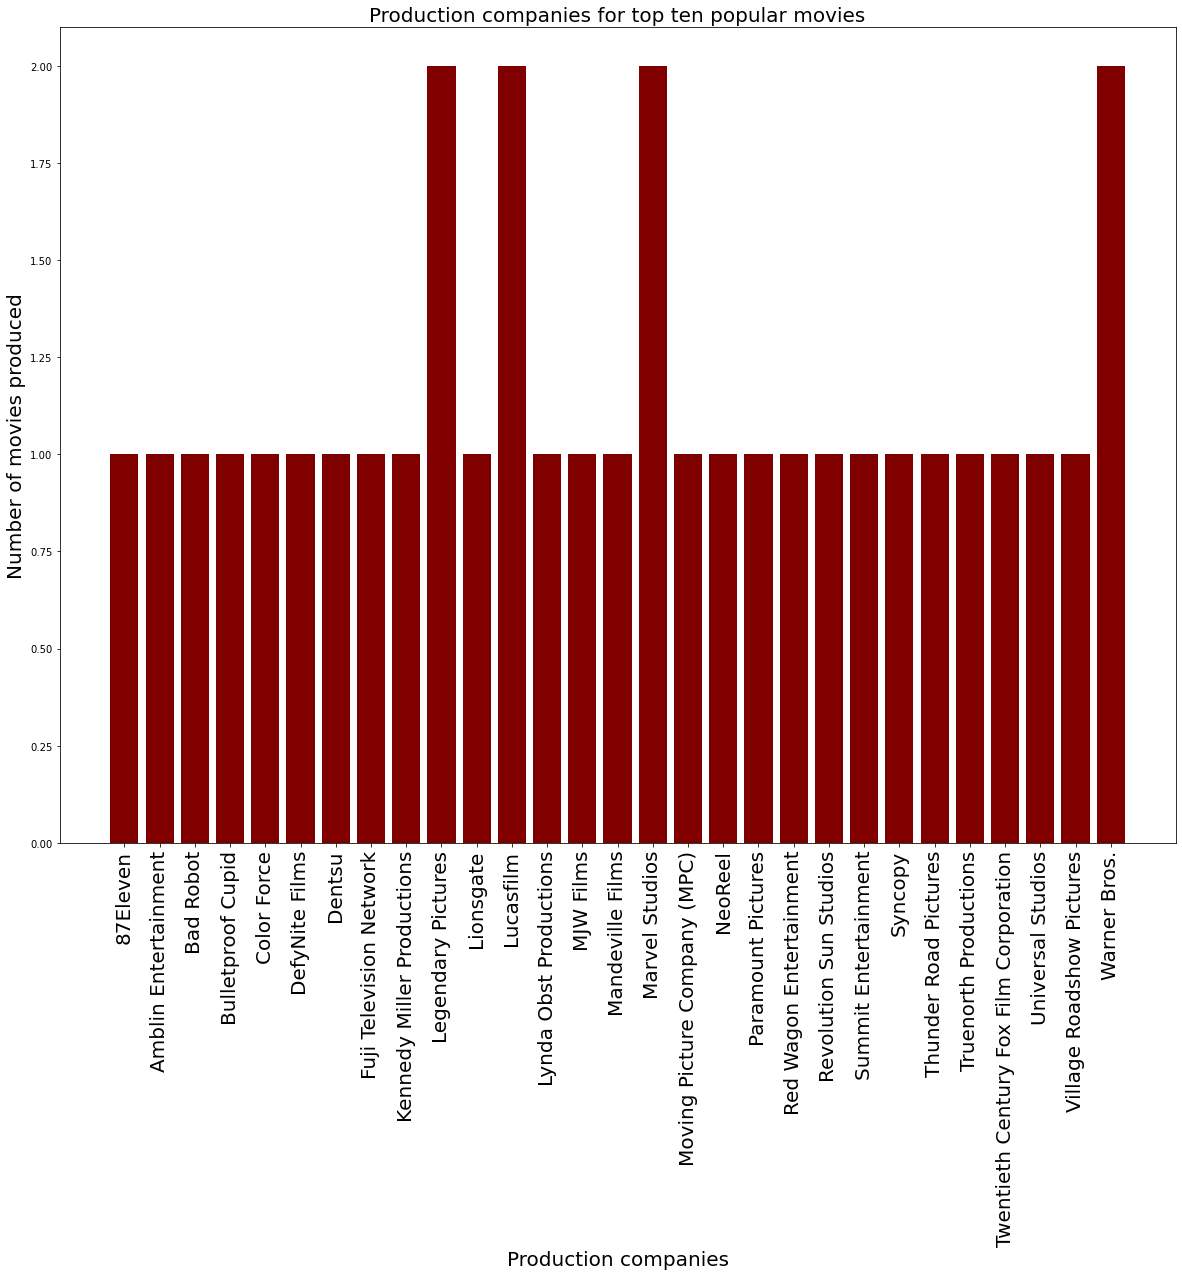

In [15]:
df_prdocomp=df.nlargest(n=10, columns='popularity')
df_prdocomp = df_prdocomp.sort_values(by = 'popularity',ascending=False)
df_popular_production_companies=df_prdocomp['production_companies'].str.split(r"|", expand=True)
df223=df_popular_production_companies.apply(pd.value_counts) # finding the total apperances in top populairity movies
df223['total_appearances']=df223.sum(axis = 1)

bargraphplot(df223.index,
             df223.total_appearances,
             'maroon',
             'Production companies for top ten popular movies',
             "Production companies",
             "Number of movies produced")
plt.savefig("production companies for top ten popular movies.jpg",bbox_inches='tight')

# top ten popular movies and  directors

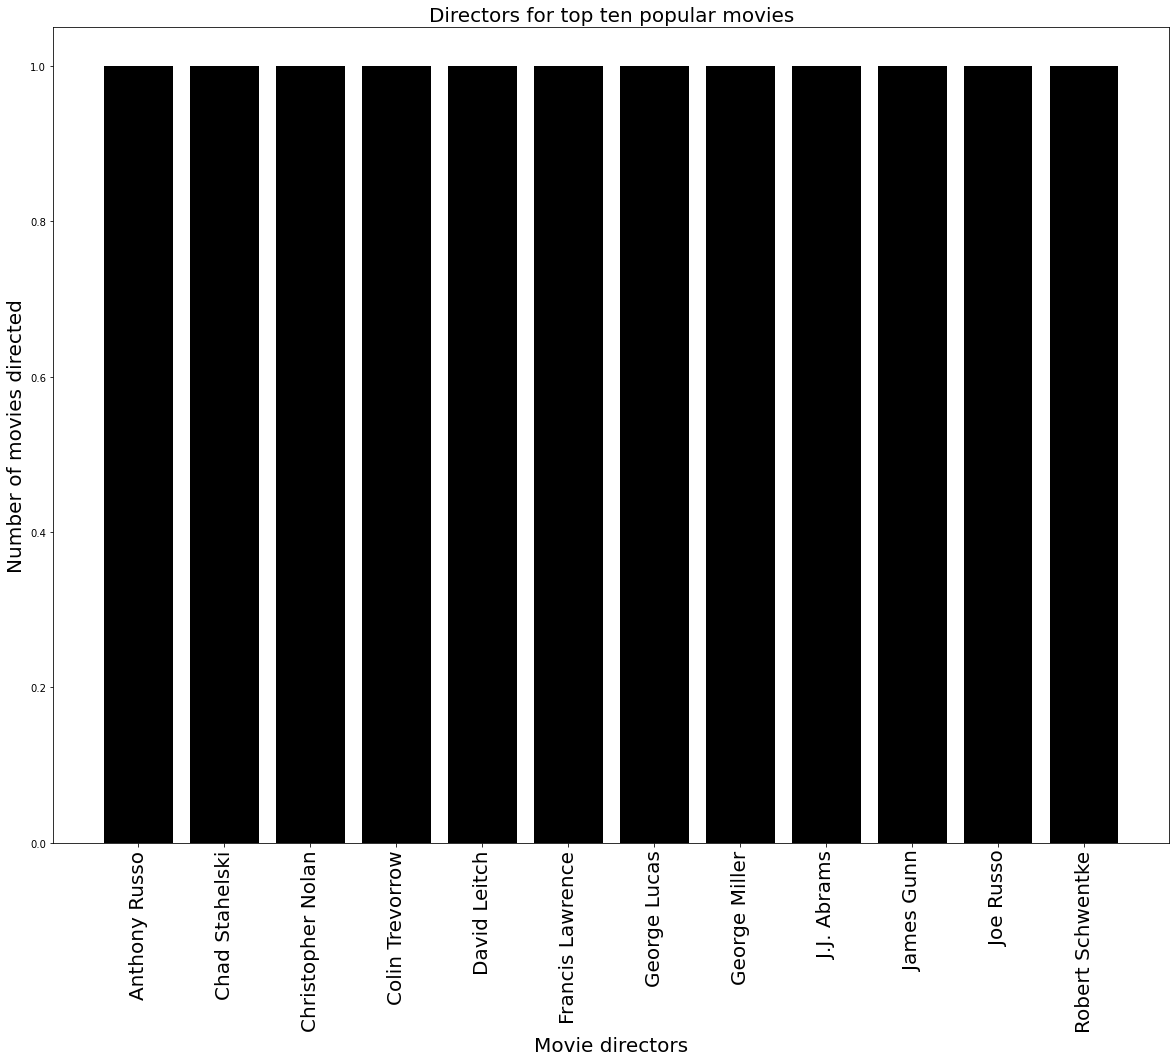

In [17]:
df_directors=df.nlargest(n=10,columns='popularity')
df_directors = df_prdocomp.sort_values(by = 'popularity',ascending=False)

df_directors2=df_directors['director'].str.split(r"|", expand=True)
df223=df_directors2.apply(pd.value_counts) # finding the total apperances in top populairity movies
df223['total_appearances']=df223.sum(axis = 1)

bargraphplot(df223.index,
             df223.total_appearances,
             'k',
             'Directors for top ten popular movies',
             "Movie directors",
             "Number of movies directed")

plt.savefig("directors for top ten popular movies.jpg",bbox_inches='tight')